<a href="https://colab.research.google.com/github/hhbenraheem/dads-lab/blob/main/ml_6520422005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pickle
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt #dpi 600
import seaborn as sns
np.set_printoptions(suppress=True)

In [39]:
data = pd.read_csv('https://raw.githubusercontent.com/hhbenraheem/dads-lab/main/6003-LAB/Kaggle%20Housing%20Prices%20Dataset.csv')

## **1. Data Exploration**

In [4]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
data.shape

(545, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


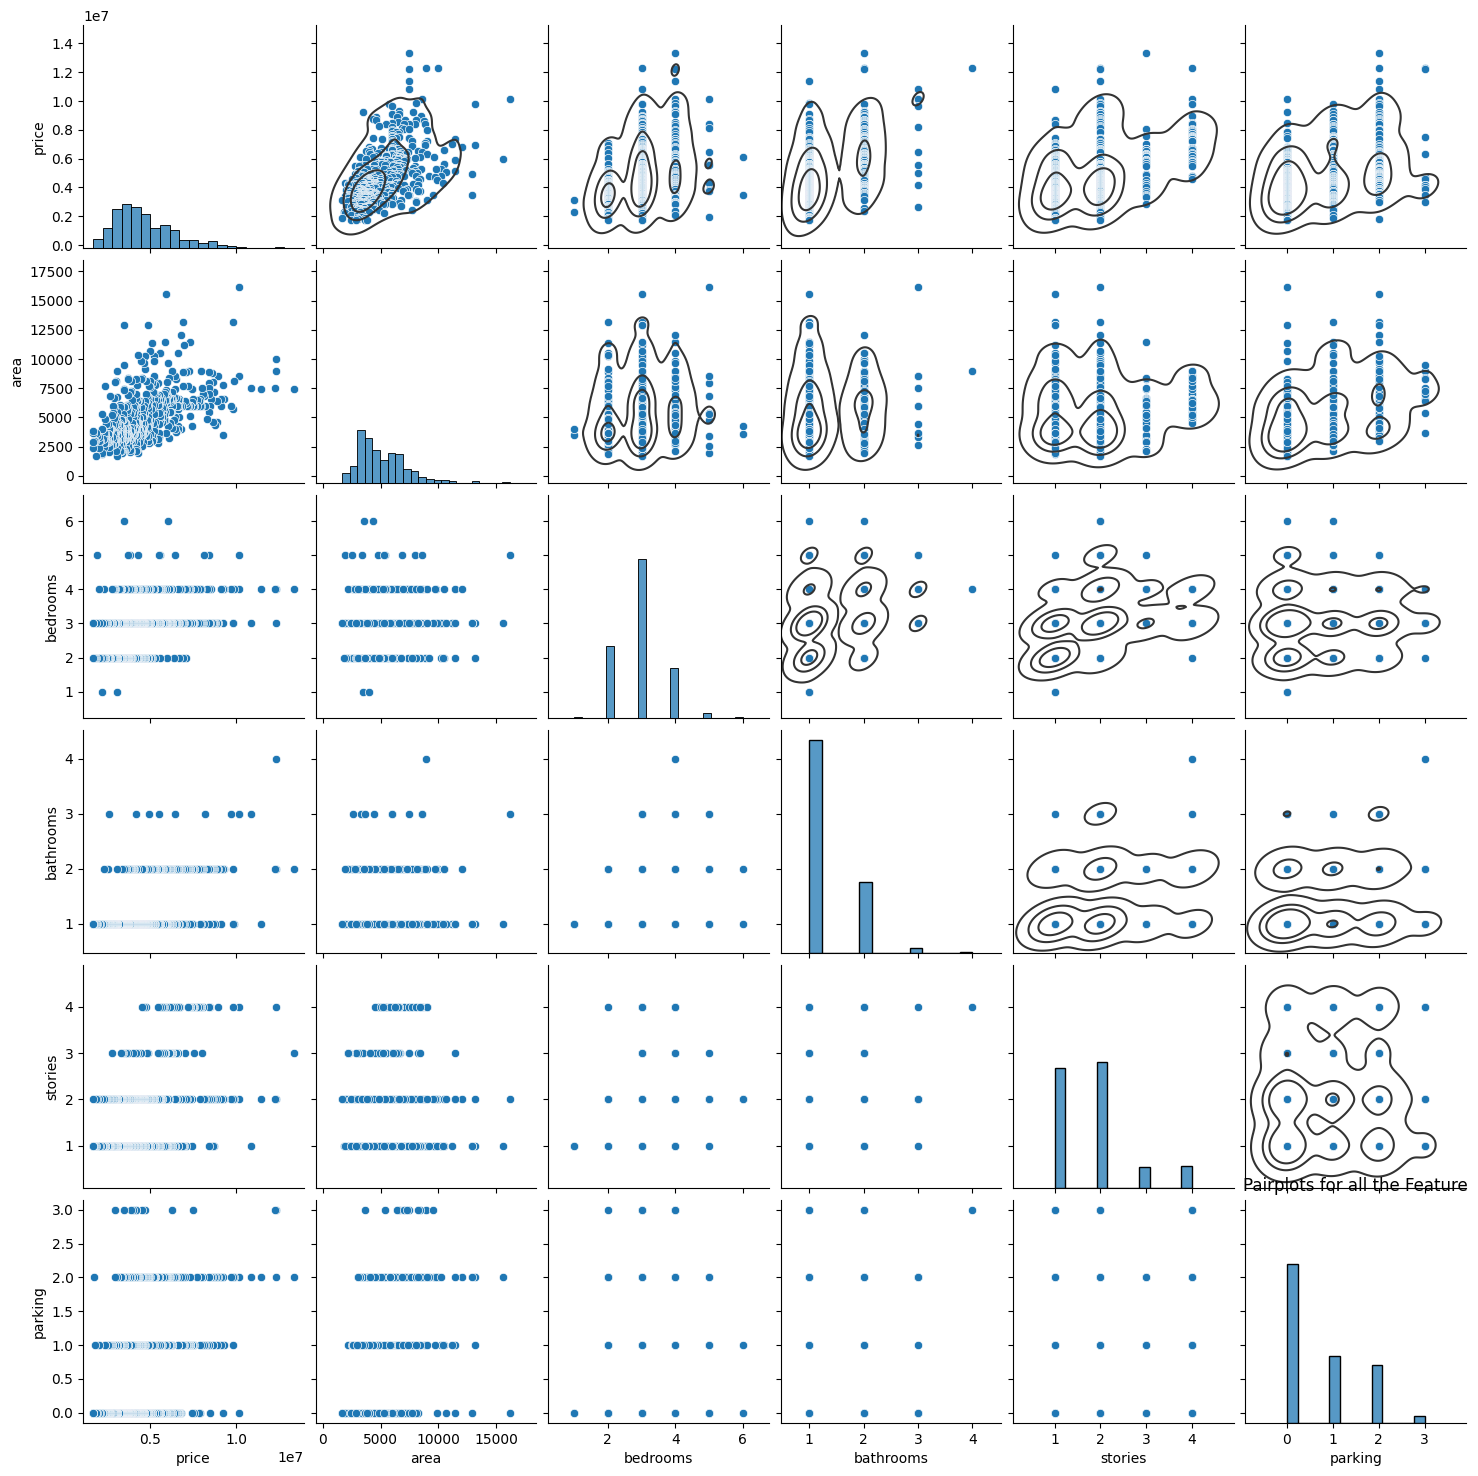

In [11]:
g = sns.pairplot(data)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

## **2.Data Processing**

In [40]:
catlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

data[catlist] = data[catlist].apply(binary_map)
data.drop('furnishingstatus',axis='columns', inplace=True)

In [41]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0


## **3.Data Modelling**

In [48]:
df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

In [49]:
y_train = df_train.pop('price')
X_train = df_train

In [50]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) #training process
print(type(lin_reg.intercept_)) #theta0
print(type(lin_reg.coef_)) #theta1, theta2,...

<class 'numpy.float64'>
<class 'numpy.ndarray'>


In [51]:
y_test = df_test.pop('price')
X_test = df_test

In [53]:
y_pred = lin_reg.predict(X_test)

Text(0, 0.5, 'y_pred')

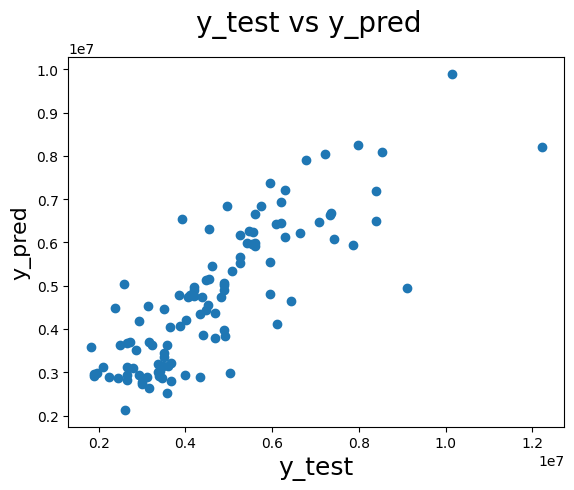

In [54]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [56]:
mean_squared_error(y_test, y_pred, multioutput='raw_values')

array([1.15590965e+12])

## **4.Saving Model**

In [57]:
pickle.dump(lin_reg, open('ml_6520422005.sav','wb') )
from google.colab import files
files.download('ml_6520422005.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>